# Random Graph Algorithms

# Barabasi-Albert

Graph barabasiAlbert(int numVertices, int minDegree)
{
    std::default_random_engine generator;

    std::vector<int> bigM(2*numVertices*minDegree);
    int r;

    for (int v=0; v < numVertices; ++v)
    {
        for (int i=0; i < minDegree; ++i)
        {
            bigM[2*(v*minDegree + i)] = v;

            std::uniform_int_distribution<int> distr(0, 2*(v*minDegree + i));
            r = distr(generator);

            bigM[(2*(v*minDegree + i)) + 1] = bigM[r];
        }
    }

    std::vector<int> u;
    std::vector<int> v;

    int edge1, edge2;
    std::vector<int> adjacency1;

    std::map<int, std::vector<int>> bigEHashMap;

    for (int i=0; i < (numVertices*minDegree); ++i)
    {
        edge1 = bigM[2*i];
        edge2 = bigM[(2*i) + 1];

        if ( bigEHashMap.find(edge1) != bigEHashMap.end() )
        {
            adjacency1 = bigEHashMap[edge1];
            if (std::find(adjacency1.begin(), adjacency1.end(), edge2) == adjacency1.end())
            {
                u.push_back(edge1);
                v.push_back(edge2);

                bigEHashMap[edge1].push_back(edge2);
            }
        }
        else 
        {
            u.push_back(edge1);
            v.push_back(edge2);
            bigEHashMap[edge1].push_back(edge2);
        }
    }
    Graph g;
    g = make_graph(numVertices, u, v);
    return g;
}

# Erdos_Reyni

Graph erdosReyni(int numVertices, double p)
{
    int v = 1;
    int w=  -1;

    double r;
    int f;

    std::default_random_engine generator;

    std::vector<int> edges1;
    std::vector<int> edges2;

    while (v < numVertices)
    {
        std::uniform_real_distribution<double> distr(0.0, 1.0);
        r = distr(generator);
        f = floor( (log2(1 - r)) / (log(1 - p)) );
        w = ( w + 1 + f );
        while ( (w >= v) && (v < numVertices) )
        {
            w = ( w - v );
            ++v;
        }
        if (v < numVertices)
        {
            edges1.push_back(v);
            edges2.push_back(w);
        }
    }

    Graph g;
    g = make_graph(numVertices, edges1, edges2);
    return g;
}

In [1]:
import pandas as pd
import numpy as np
from math import log2, e
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

# Barabasi-Albert: Diameter

In [42]:
df_barbasi_diameter = pd.read_csv("data/barabasi/diameter.csv",header=None, names=["Size","Diameter"])

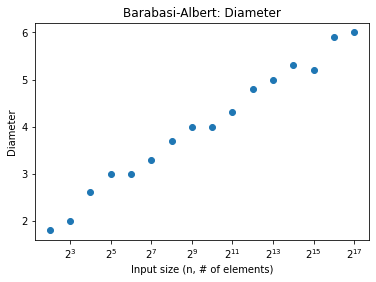

In [43]:
x = df_barbasi_diameter["Size"]
y = df_barbasi_diameter["Diameter"]


plt.semilogx(x, y, '.', base=2, markersize=12)
                   

plt.title("Barabasi-Albert: Diameter")
plt.xlabel('Input size (n, # of elements)')
plt.ylabel('Diameter')

plt.show()

The diameter increases as a function of n and grows proportional to log n

# Erdos-Reyni: Diameter

In [44]:
df_erdos_diameter = pd.read_csv("data/erdos/diameter.csv",header=None, names=["Size","Diameter"])

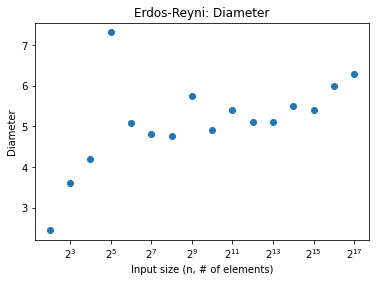

In [45]:
x = df_erdos_diameter["Size"]
y = df_erdos_diameter["Diameter"]


plt.semilogx(x, y, '.', base=2, markersize=12)
                   

plt.title("Erdos-Reyni: Diameter")
plt.xlabel('Input size (n, # of elements)')
plt.ylabel('Diameter')

plt.show()

The diameter somewhat increases as a function of n, but grows slower than log n.

# Barabasi-Albert: Clustering Coefficient

In [46]:
df_barabasi_coeff = pd.read_csv("data/barabasi/coefficient.csv",header=None, names=["Size","Diameter"])

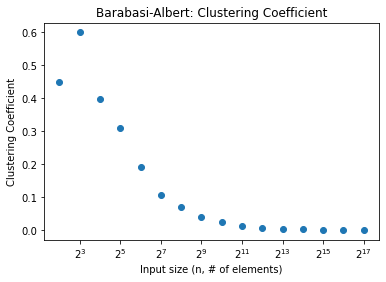

In [47]:
x = df_barabasi_coeff["Size"]
y = df_barabasi_coeff["Diameter"]


plt.semilogx(x, y, '.', base=2, markersize=12)
                   

plt.title("Barabasi-Albert: Clustering Coefficient")
plt.xlabel('Input size (n, # of elements)')
plt.ylabel('Clustering Coefficient')

plt.show()

The clustering coefficient decreases as a function of n.

# Erdos-Reyni: Clustering Coefficient

In [48]:
df_erdos_coeff = pd.read_csv("data/erdos/coefficient.csv",header=None, names=["Size","Diameter"])

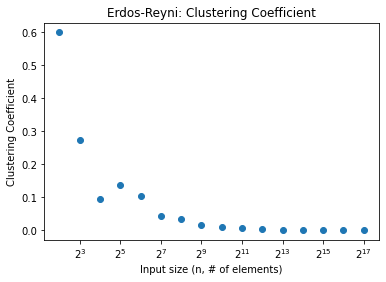

In [49]:
x = df_erdos_coeff["Size"]
y = df_erdos_coeff["Diameter"]


plt.semilogx(x, y, '.', base=2, markersize=12)
                   

plt.title("Erdos-Reyni: Clustering Coefficient")
plt.xlabel('Input size (n, # of elements)')
plt.ylabel('Clustering Coefficient')

plt.show()

The clustering coefficient decreases as a function of n.

# Barabasi-Albert: Degree Distribution, 1000

In [53]:
df_barabasi_degree = pd.read_csv("data/barabasi/degree1000.csv",header=None, names=["Size","Diameter"])

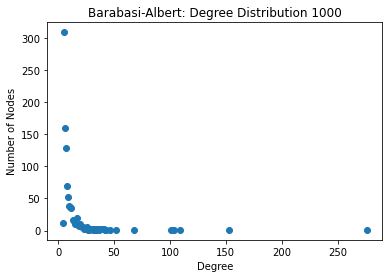

In [54]:
x = df_barabasi_degree["Size"]
y = df_barabasi_degree["Diameter"]


plt.plot(x, y, '.', markersize=12) 
                   

plt.title("Barabasi-Albert: Degree Distribution 1000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

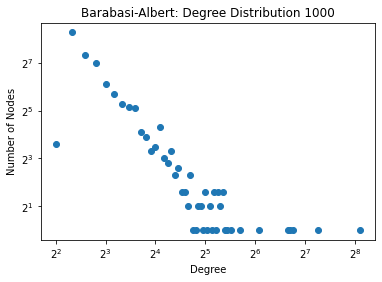

In [55]:
p = plt.loglog(x, y, '.', base = 2, markersize = 12)                 

plt.title("Barabasi-Albert: Degree Distribution 1000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

Since the lin-log plot has a long tail and the log-log plot has a negative linear relationship, this degree distribution has a power law.

# Power Law

In [58]:
logx, logy = np.log(x), np.log(y)
m, b = np.polyfit(logx, logy, 1)

m

-1.5518847498330235

# Barabasi-Albert: Degree Distribution, 10,000

In [59]:
df_barabasi_degree = pd.read_csv("data/barabasi/degree10000.csv",header=None, names=["Size","Diameter"])

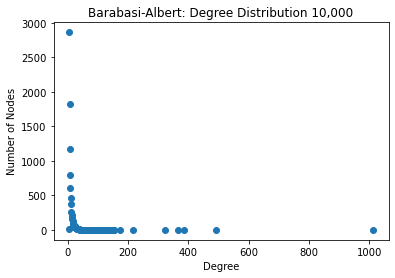

In [60]:
x = df_barabasi_degree["Size"]
y = df_barabasi_degree["Diameter"]


plt.plot(x, y, '.', markersize=12) 
                   

plt.title("Barabasi-Albert: Degree Distribution 10,000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

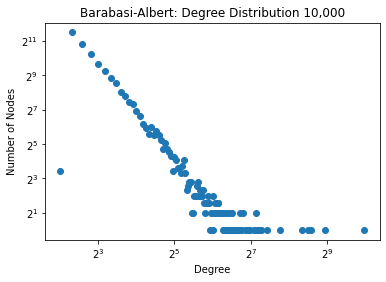

In [61]:
p = plt.loglog(x, y, '.', base = 2, markersize = 12)                 

plt.title("Barabasi-Albert: Degree Distribution 10,000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

Since the lin-log plot has a long tail and the log-log plot has a negative linear relationship, this degree distribution has a power law.

# Power Law

In [62]:
logx, logy = np.log(x), np.log(y)
m, b = np.polyfit(logx, logy, 1)

m

-1.8583757829660932

# Barabasi-Albert: Degree Distribution, 100,000

In [63]:
df_barabasi_degree = pd.read_csv("data/barabasi/degree100000.csv",header=None, names=["Size","Diameter"])

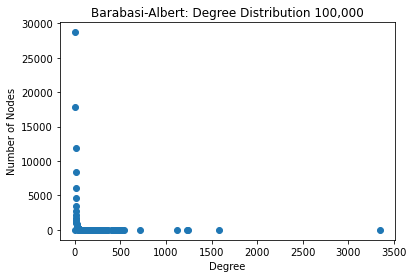

In [64]:
x = df_barabasi_degree["Size"]
y = df_barabasi_degree["Diameter"]

plt.plot(x, y, '.', markersize=12) 
                   

plt.title("Barabasi-Albert: Degree Distribution 100,000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

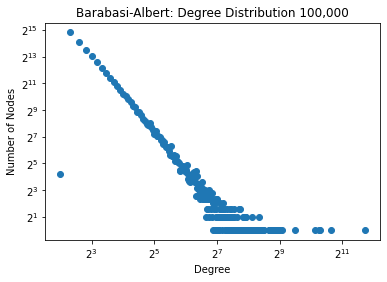

In [65]:
p = plt.loglog(x, y, '.', base = 2, markersize = 12)                 

plt.title("Barabasi-Albert: Degree Distribution 100,000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

Since the lin-log plot has a long tail and the log-log plot has a negative linear relationship, this degree distribution has a power law.

# Power Law

In [66]:
logx, logy = np.log(x), np.log(y)
m, b = np.polyfit(logx, logy, 1)

m

-2.0414630704319072

# Erdos-Reyni: Degree Distribution, 1000

In [67]:
df_erdos_degree = pd.read_csv("data/erdos/degree1000.csv",header=None, names=["Size","Diameter"])

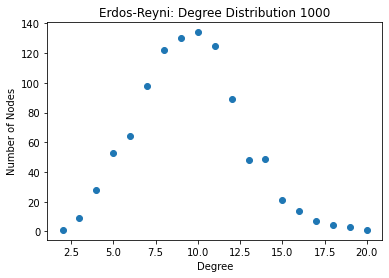

In [68]:
x = df_erdos_degree["Size"]
y = df_erdos_degree["Diameter"]


plt.plot(x, y, '.', markersize=12) 
                   

plt.title("Erdos-Reyni: Degree Distribution 1000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

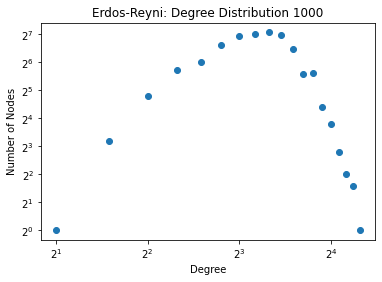

In [69]:
p = plt.loglog(x, y, '.', base = 2, markersize = 12)
                   
plt.title("Erdos-Reyni: Degree Distribution 1000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

Since the lin-log plot has no tail and the log-log plot has a bell-curved relationship, this degree distribution does not have a power law.

# Erdos-Reyni: Degree Distribution, 10,000

In [70]:
df_erdos_degree = pd.read_csv("data/erdos/degree10000.csv",header=None, names=["Size","Diameter"])

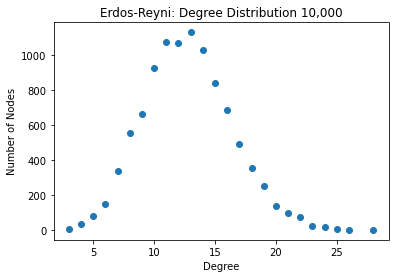

In [71]:
x = df_erdos_degree["Size"]
y = df_erdos_degree["Diameter"]


plt.plot(x, y, '.', markersize=12) 
                   

plt.title("Erdos-Reyni: Degree Distribution 10,000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

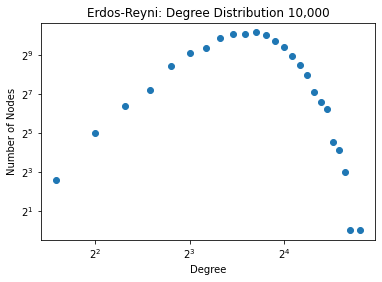

In [72]:
p = plt.loglog(x, y, '.', base = 2, markersize = 12)
                   
plt.title("Erdos-Reyni: Degree Distribution 10,000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

Since both the lin-log plot and the log-log plot have a bell-curved relationship, this degree distribution does not have a power law.

# Erdos-Reyni: Degree Distribution, 100,000

In [73]:
df_erdos_degree = pd.read_csv("data/erdos/degree100000.csv",header=None, names=["Size","Diameter"])

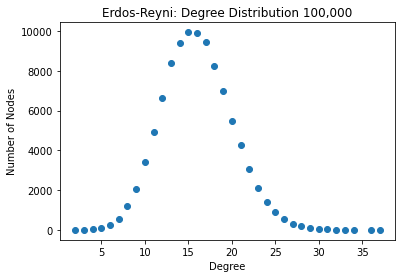

In [74]:
x = df_erdos_degree["Size"]
y = df_erdos_degree["Diameter"]

plt.plot(x, y, '.', markersize=12) 
                   
plt.title("Erdos-Reyni: Degree Distribution 100,000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

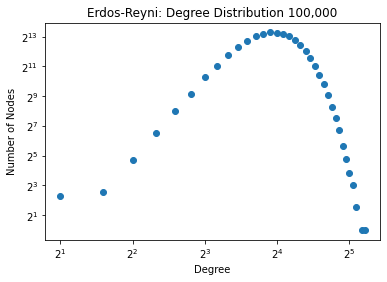

In [75]:
p = plt.loglog(x, y, '.', base = 2, markersize = 12)
                   
plt.title("Erdos-Reyni: Degree Distribution 100,000")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.show()

Since both the lin-log plot and the log-log plot have a bell-curved relationship, this degree distribution does not have a power law.